# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


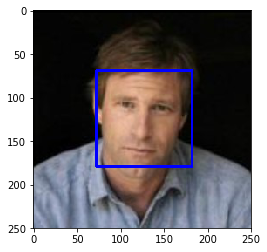

In [56]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [57]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
num = 100
human_faces_in_humans = 0
human_faces_in_dogs = 0
for i in tqdm(range(num)):
    human_faces_in_humans += face_detector(human_files_short[i])
    human_faces_in_dogs += face_detector(dog_files_short[i])

print("Human faces in humans photos: %d%%" % (100 * human_faces_in_humans // num))
print("Human faces in dogs photos: %d%%" % (100 * human_faces_in_dogs // num))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.74it/s]


Human faces in humans photos: 96%
Human faces in dogs photos: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [58]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

print("Cuda is available: ", use_cuda)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
VGG16.eval()

Cuda is available:  True


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [80]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # ... this is done in generic_predict
    return generic_dog_predict(VGG16, img_path) # predicted class index


def generic_dog_predict(model, img_path, sz=224, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    img = Image.open(img_path)
    transform = transforms.Compose([
        transforms.Resize(sz),
        transforms.CenterCrop(sz),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])
    img_norm = transform(img).unsqueeze_(0)
    if use_cuda:
        img_norm = img_norm.cuda()
    with torch.no_grad():
         outputs = model(img_norm).cpu().numpy()
    top_class = np.argmax(outputs)
    return top_class
    

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [78]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    # ... done in generic_detector
    return generic_dog_detector(VGG16_predict, img_path)

def generic_dog_detector(predict, img_path):
    pred = predict(img_path)
    imn_dogs_start_idx = 151
    imn_dogs_end_idx = 268
    is_dog = imn_dogs_start_idx <= pred <= imn_dogs_end_idx
    return is_dog
    

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [79]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

num = 100
dogs_in_humans = 0
dogs_in_dogs = 0
for i in tqdm(range(num)):
    dogs_in_humans += dog_detector(human_files_short[i])
    dogs_in_dogs += dog_detector(dog_files_short[i])

print("Dogs detected in humans photos: %d%%" % (100 * dogs_in_humans // num))
print("Dogs detected in dogs photos: %d%%" % (100 * dogs_in_dogs // num))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.07it/s]


Dogs detected in humans photos: 0%
Dogs detected in dogs photos: 93%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [84]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define model
resnet50 = models.resnet50(pretrained=True)
# move model to GPU if CUDA is available
if use_cuda:
    resnet50 = resnet50.cuda()
    
resnet50.eval()

def resnet50_predict(img_path):
    return generic_dog_predict(resnet50, img_path)

def dog_detector_resnet(img_path):
    return generic_dog_detector(resnet50_predict, img_path)

dogs_in_humans = 0
dogs_in_dogs = 0
for i in tqdm(range(num)):
    dogs_in_humans += dog_detector_resnet(human_files_short[i])
    dogs_in_dogs += dog_detector_resnet(dog_files_short[i])

print("Dogs detected in humans photos (resnet50): %d%%" % (100 * dogs_in_humans // num))
print("Dogs detected in dogs photos (resnet50): %d%%" % (100 * dogs_in_dogs // num))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.02it/s]


Dogs detected in humans photos (resnet50): 1%
Dogs detected in dogs photos (resnet50): 96%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [47]:
import os
from torchvision import datasets
from PIL import ImageFile
import pickle
from  RobustImageFolder import RobustImageFolder

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

def calc_mean_std(path, bs=64, size=224):
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor()
    ])
    dataset = RobustImageFolder(path, transform=transform)
    loader = torch.utils.data.DataLoader(dataset, batch_size=bs, num_workers=4)
    mean = torch.zeros(3)
    std = torch.zeros(3)
    count = 0
    for data in loader:
        # get image data
        data = data[0]
        # flatten
        data = data.view(data.shape[0], data.shape[1], -1)
        # calc mean & std per channel and sum over batch dimension
        mean += data.mean(2).sum(0)
        std += data.std(2).sum(0)
        count += data.shape[0]

    mean /= count
    std /= count
    return mean.numpy(), std.numpy()

def make_loader(path, bs=64, size=224, rot_deg = 5, norm=None, train=False):
    tmfs = []
    if train:
        tmfs = [
            transforms.RandomRotation(rot_deg),
            transforms.RandomResizedCrop(size),
            transforms.RandomHorizontalFlip()
        ]
    else:
        tmfs = [
            transforms.Resize(size),
            transforms.CenterCrop(size)
        ]
    tmfs.append(transforms.ToTensor())
    tmfs.append(transforms.Normalize(mean = norm['mean'], std = norm['std']))
    transform = transforms.Compose(tmfs)
    dataset = RobustImageFolder(path, transform=transform)
    loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=4)
    return loader

data_path = 'data/dogImages/'
train_path = data_path + 'train'
val_path = data_path + 'valid'
test_path = data_path + 'test'
bs = 64
size = 224

train_dataset = datasets.ImageFolder(train_path)
dogs_classes = train_dataset.classes
dogs_classes_count = len(dogs_classes)

mean_std_cache = data_path + 'mean_std.dump'
if os.path.exists(mean_std_cache):
    norm = pickle.load(open(mean_std_cache, 'rb'))
else:
    mean, std = calc_mean_std(train_path, bs=bs, size=size)
    norm = {'mean': mean, 'std': std}
    pickle.dump(norm, open(mean_std_cache, 'wb'))

print('normalization for train:', norm)
    
loaders_scratch = {
    'train': make_loader(train_path, bs=bs, size=size, norm=norm, train=True),
    'valid': make_loader(val_path, bs=bs, size=size, norm=norm),
    'test': make_loader(test_path, bs=bs, size=size, norm=norm)
}



normalization for train: {'mean': array([0.48805875, 0.46292824, 0.3957889 ], dtype=float32), 'std': array([0.23009694, 0.22556865, 0.22421855], dtype=float32)}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I decided to go with "standard" input size that is used for many other well-known models - 224x224.
This way I can also compare my model to other existing models :)

For training data, I resize images using torchvision transformer RandomResizedCrop, which makes randomly scaled patches of image resized to specified size. For validation/test datasets, I resize smallest side to 224 and do CenterCrop tranformation to make square image.
Other transformations are common for both train and validation/test datasets - converting to torch tensor and normalizing using mean and std pre-calculated on the train dataset.

As additional augmentation, I use RandomRotation and RandomHorizontalFlip transforms.
These transformations are natural for dog photos and should improve model invariance.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 7, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.fc1 = nn.Linear(128 * 12 * 12, 2000)
        self.fc2 = nn.Linear(2000, dogs_classes_count)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)

    def forward(self, x):
        ## Define forward behavior
        x = self.bn1(self.conv1(x)) # 106
        x = F.relu(F.max_pool2d(x, 2)) # 53
        x = self.bn2(self.conv2(x)) # 51
        x = F.relu(F.max_pool2d(x, 2)) # 25
        x = self.bn3(self.conv3(x)) # 23
        x = F.relu(F.max_pool2d(x, 2)) # 12
        # flatten
        x = x.view(x.size(0), -1)
        x = F.dropout(x, p=0.2, training=self.training)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch = model_scratch.cuda()
    
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=18432, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=133, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I decided to go with pretty standard convolutional net architecture, not very deep so it can be easily trained.
It's somewhat close to one of the first models for MNIST recognition, but have more params.
There're 3 similar blocks having same operations:
 * Convolution (each block doubles number of channels: 32->64->128, this is common rule of thumb to increase channels with each layer)
 * Batch Normalization (improves training process by normalizing layer outputs)
 * Max Pooling (2x2, to reduce number of params)
 * ReLU (commonly used activation function)

These 3 blocks shrink input image into tensor with dimensions 128x12x12.
Such blocks should transform the input image into representation of image features.
After that, we flatten the resulting tensor and use 2 fully connected layers of sizes 2000 and 133 with dropouts in between (Dropout is good regularization and ensembling technique).
These last layers should do classification task on image features created by earlier layers.

The final output is passed through softmax (probability of class) followed by log (to work well with pytorch loss function NLLLoss(), because NLLLoss() does not apply log, we apply it with log_softmax()).

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

lr = 0.001
momentum = 0.9
wd = 0.0001

### TODO: select loss function
criterion_scratch = torch.nn.NLLLoss()
if use_cuda:
    criterion_scratch.cuda()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=lr, momentum=momentum, weight_decay=wd)
    

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            optimizer.zero_grad()
            output = model(data)
            #print('targ', target)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            #print('loss', loss.data)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss_min > valid_loss:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, data_path + 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load(data_path + 'model_scratch.pt'))

Epoch: 1 	Training Loss: 4.859521 	Validation Loss: 4.799464
Epoch: 2 	Training Loss: 4.729268 	Validation Loss: 4.650929
Epoch: 3 	Training Loss: 4.585954 	Validation Loss: 4.533689
Epoch: 4 	Training Loss: 4.513768 	Validation Loss: 4.415133
Epoch: 5 	Training Loss: 4.445313 	Validation Loss: 4.335047
Epoch: 6 	Training Loss: 4.384966 	Validation Loss: 4.240221
Epoch: 7 	Training Loss: 4.333119 	Validation Loss: 4.213597
Epoch: 8 	Training Loss: 4.280743 	Validation Loss: 4.201987
Epoch: 9 	Training Loss: 4.235458 	Validation Loss: 4.100161
Epoch: 10 	Training Loss: 4.198963 	Validation Loss: 4.060810
Epoch: 11 	Training Loss: 4.159637 	Validation Loss: 4.091691
Epoch: 12 	Training Loss: 4.136865 	Validation Loss: 4.035838
Epoch: 13 	Training Loss: 4.090382 	Validation Loss: 3.945851
Epoch: 14 	Training Loss: 4.077410 	Validation Loss: 3.994234
Epoch: 15 	Training Loss: 4.029552 	Validation Loss: 3.998394
Epoch: 16 	Training Loss: 4.015161 	Validation Loss: 3.865830
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        #print(output)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        #print(pred)
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.517250


Test Accuracy: 15% (132/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [97]:
## TODO: Specify data loaders
# since this is imagenet-trained model, apply imagenet normalization values
image_net_norm = {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
loaders_transfer = {
    'train': make_loader(train_path, bs=bs, size=size, norm=image_net_norm, train=True),
    'valid': make_loader(val_path, bs=bs, size=size, norm=image_net_norm),
    'test': make_loader(test_path, bs=bs, size=size, norm=image_net_norm)
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [93]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

# freeze all params
for param in model_transfer.parameters():
    param.requires_grad = False

# replace the last layer
model_transfer.fc = nn.Linear(2048, dogs_classes_count)
 
if use_cuda:
    model_transfer = model_transfer.cuda()



__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I took resnet50 as "backbone" model because it's relatively small and fast but has good accuracy.
All the layers were frozen, except the last fully connected layer was replaced with untrained fully connected layer to classify dog breeds from 2048 image features produced by backbone model.

Since this resnet50 model is already trained on ImageNet and "knows" some dog breeds, re-tuning it to recognize dog breeds only (plus some additional dog breeds granularity) should work nicely.

It might also make sense to unfreeze some of the last layers to fine-tune them for dog breeds task as well, but I don't do that to make training process faster.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [94]:
criterion_transfer = nn.CrossEntropyLoss()
if use_cuda:
    criterion_transfer = criterion_transfer.cuda()

optimizer_transfer = optim.Adam(model_transfer.parameters(), weight_decay=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [95]:
# train the model
n_epochs = 3
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, data_path + 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load(data_path + 'model_transfer.pt'))

Epoch: 1 	Training Loss: 2.788052 	Validation Loss: 1.003113
Epoch: 2 	Training Loss: 1.236370 	Validation Loss: 0.649612
Epoch: 3 	Training Loss: 0.988192 	Validation Loss: 0.520206


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [98]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.546316


Test Accuracy: 82% (691/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [100]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dogs_classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    tfms = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=image_net_norm['mean'], std=image_net_norm['std'])
    ])
    inp = tfms(img).unsqueeze_(0)
    if use_cuda:
        inp = inp.cuda()
    with torch.no_grad():
        output = model_transfer(inp)
    res = np.argmax(output.cpu().numpy())
    return class_names[res]


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [112]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

from IPython.core.display import display, HTML

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    is_dog = dog_detector_resnet(img_path)
    is_person = face_detector(img_path) if not is_dog else False

    # Predict breed
    dog_class = predict_breed_transfer(img_path)
    dog_class_link = HTML("<a href='https://www.google.com/search?tbm=isch&q=%(dog)s'>%(dog)s</a>" % {'dog': dog_class })
    if is_person:
        print("Hi Human!")
        plt.imshow(Image.open(img_path))
        plt.show()
        print("You look like a ... ")
        display(dog_class_link)
    elif is_dog:
        plt.imshow(Image.open(img_path))
        plt.show()
        print("This dog's breed is ...")
        display(dog_class_link)
    else:
        # neither
        print("Could not find anything interesting on your image :(")
        plt.imshow(Image.open(img_path))
        plt.show()
        print("But if you ask, it looks like ...")
        display(dog_class_link)
        
    
      


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

1. Performance for dog breeds seems good even with hard cases where part of the dog is occluded. Also the resnet50 model didn't buy into fake dogs images but fine-tuned model provided rather close-looking predictions for them :)

2. Guessing dogs breeds for human images is a bit disappointing :) It seems that the model does not really catch "high-level" similarity but rather texture/color.

3. Improvements:
 * The main drawback is that the model expects only one dog per image. If there're multiple dogs of different breeds the prediction can be wrong for all of them. To improve on that, my stretch goal for this project is to use segmentation to first extract each dog (or person) from the image and then apply dog breed recognition model!
 * The app itself can only choose between person or dog, and can't do both, for example. When image has both face and dog it would be nice to provide prediction for both. This item can be also covered by segmentation step in the pipeline.
 * Not all dog breeds are present in the training dataset. It could be expanded by downloading images from the internet to make predictions more accurate. 
 * To provide more initeresting results for "human as dog" recognition, maybe it makes sense to create separate model for "human as dog" prediction that will be trained or tuned on additional datasets like these: https://petapixel.com/2018/09/20/photos-of-humans-and-dogs-who-look-strangely-alike/, https://www.wideopenpets.com/15-people-look-like-dogs/


This dog's breed is ...


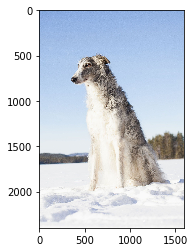

This dog's breed is ...


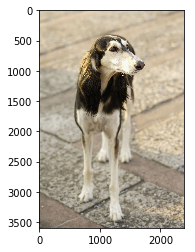

This dog's breed is ...


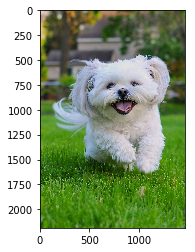

This dog's breed is ...


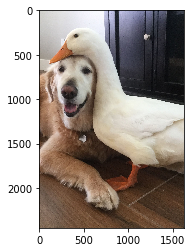

Could not find anything interesting on your image :(
But it looks like ...


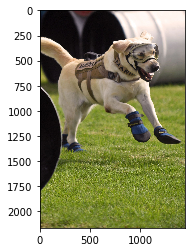

This dog's breed is ...


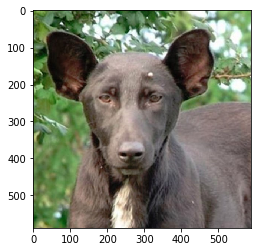

Hi Human! You look like a ... 


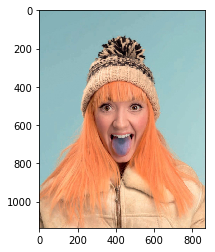

Hi Human! You look like a ... 


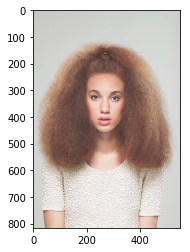

Hi Human! You look like a ... 


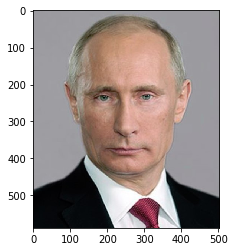

Hi Human! You look like a ... 


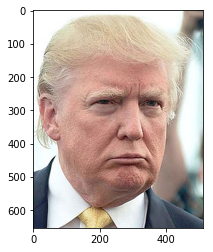

This dog's breed is ...


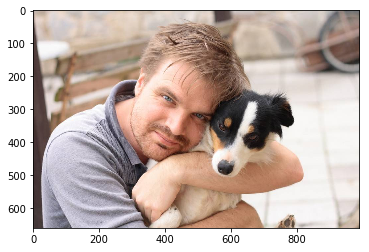

Could not find anything interesting on your image :(
But it looks like ...


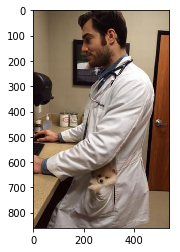

Could not find anything interesting on your image :(
But it looks like ...


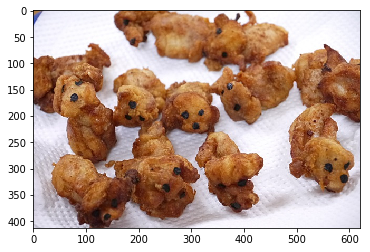

Could not find anything interesting on your image :(
But it looks like ...


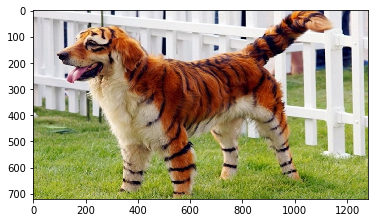

In [115]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

for file in glob('test/**/*.jpg'):
    run_app(file)
    print('=============================')

